In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARMAX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsESN1S = pd.read_excel('grilla_ESN_NARMAX_1STEPS.xlsx', header=0)
summaryModelsESN2S = pd.read_excel('grilla_ESN_NARMAX_2STEPS.xlsx', header=0)
summaryModelsESN3S = pd.read_excel('grilla_ESN_NARMAX_3STEPS.xlsx', header=0)

grilla_ESN_NARMAX_AQP = pd.concat([summaryModelsESN1S, summaryModelsESN2S], ignore_index=True)
grilla_ESN_NARMAX_AQP = pd.concat([grilla_ESN_NARMAX_AQP, summaryModelsESN3S], ignore_index=True)

grilla_ESN_NARMAX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    216 non-null    float64
 1   delayedSteps            216 non-null    int64  
 2   nameModel               216 non-null    object 
 3   nameHistory             216 non-null    object 
 4   nameConfiguration       216 non-null    object 
 5   timeTrain (in seconds)  216 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.2+ KB


##La cantidad de modelos generados para el ESN NARX de DDFO fue de 216

In [4]:
rslt_df = grilla_ESN_NARMAX_AQP.sort_values('MAPE')
total = grilla_ESN_NARMAX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_ESN_NARMAX_AQP.describe()

Tiempo total: 20159.0


MAPE  delayedSteps  timeTrain (in seconds)
count  216.000000    216.000000              216.000000
mean    91.577452      2.000000               93.328704
std     18.998561      0.818393                7.286488
min     17.853396      1.000000               46.180000
25%     97.227185      1.000000               91.037500
50%     99.628454      2.000000               92.480000
75%     99.667604      3.000000               95.260000
max    100.223172      3.000000              154.950000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 20159, lo que equivale a 5 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
205  17.853396  ...                  100.01
61   18.414166  ...                   95.01
204  18.912018  ...                  101.72
187  19.169418  ...                   92.06
132  19.254101  ...                  101.06
60   19.861962  ...                   96.44
43   19.939375  ...                   93.78
115  20.593224  ...                   98.27
42   23.629735  ...                   91.76
211  47.130911  ...                  104.05
97   48.075676  ...                   93.50
139  48.703394  ...                  100.03
169  48.899414  ...                   92.21
210  51.597670  ...                   99.14
168  53.721170  ...                   92.02
96   55.249800  ...                   94.21
138  59.682038  ...                  101.71
192  61.066792  ...                   91.82
67   61.385633  ...                   97.56
66   63.866996  ...                   97.90
193  65.040833  ...                   93.52
120  69.696960  ...                   94.99
121  70.704982  ...                   95.24
151  71.375618  ...                   92.30
48   72.289998  ...                   91.32
78   73.888145  ...                   93.01
150  74.616571  ...                   91.57
49   74.628356  ...                   90.74
7    74.723357  ...                   92.72
175  74.975963  ...                   93.71
174  76.195792  ...                   94.46
103  78.595219  ...                   93.25
31   79.577628  ...                   91.29
102  80.438951  ...                   92.99
30   82.168589  ...                   91.06
85   83.337646  ...                   92.31
55   84.484765  ...                   98.10
156  84.991942  ...                   94.28
157  86.174123  ...                   92.52
13   87.546427  ...                   92.73
12   87.970778  ...                   95.45
84   88.202970  ...                   91.61
109  89.159532  ...                   94.69
37   90.544641  ...                   91.77
19   93.940761  ...                   90.48

[45 rows x 6 columns]

In [6]:
rslt_df.iloc[0,:]

MAPE                                                                17.8534
delayedSteps                                                              3
nameModel                 results/ESN_314_1_256_sigmoid_relu_mean_absolu...
nameHistory               results/ESN_314_1_256_sigmoid_relu_mean_absolu...
nameConfiguration         results/ESN_314_1_256_sigmoid_relu_mean_absolu...
timeTrain (in seconds)                                               100.01
Name: 205, dtype: object

In [7]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAPE                                                                17.8534
delayedSteps                                                              3
nameModel                 results/ESN_314_1_256_sigmoid_relu_mean_absolu...
nameHistory               results/ESN_314_1_256_sigmoid_relu_mean_absolu...
nameConfiguration         results/ESN_314_1_256_sigmoid_relu_mean_absolu...
timeTrain (in seconds)                                               100.01
Name: 205, dtype: object


In [8]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/ESN_314_1_256_sigmoid_relu_mean_absolute_error_3S_history.npy
results/ESN_314_1_256_sigmoid_relu_mean_absolute_error_3S_config.npy
results/ESN_314_1_256_sigmoid_relu_mean_absolute_error_3S.h5


In [9]:
print(bestModel['nameHistory'].split("/")[1])
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

ESN_314_1_256_sigmoid_relu_mean_absolute_error_3S_history.npy
ESN_314_1_256_sigmoid_relu_mean_absolute_error_3S_config.npy
ESN_314_1_256_sigmoid_relu_mean_absolute_error_3S.h5


In [10]:
pip install tensorflow-addons

     |████████████████████████████████| 706kB 15.4MB/s 


In [11]:
import tensorflow_addons as tfa

In [12]:
#para recuperar history
history=np.load(bestModel['nameHistory'].split("/")[1],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'].split("/")[1])
print(saved_model.summary())
#print(saved_model.layers[2].get_config())

{'loss': [306.1749267578125, 305.9176025390625, 305.6605224609375, 305.40338134765625, 305.1462097167969, 304.88909912109375, 304.6319580078125, 304.3748474121094, 304.11767578125, 303.8605041503906, 303.60345458984375, 303.34619140625, 303.0891418457031, 302.83197021484375, 302.5748291015625, 302.31768798828125, 302.0605773925781, 301.8034362792969, 301.5462646484375, 301.2890930175781, 301.0319519042969, 300.77471923828125, 300.517578125, 300.2603759765625, 300.0032958984375, 299.74615478515625, 299.48895263671875, 299.2318420410156, 298.9747619628906, 298.7176208496094, 298.46051025390625, 298.2033386230469, 297.94622802734375, 297.6891174316406, 297.4319763183594, 297.17486572265625, 296.9176940917969, 296.6605529785156, 296.4034729003906, 296.1463623046875, 295.88916015625, 295.6320495605469, 295.37506103515625, 295.11785888671875, 294.8608093261719, 294.6036682128906, 294.34661865234375, 294.0894775390625, 293.8323059082031, 293.5751647949219, 293.31805419921875, 293.060913085937

In [13]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledESN.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledESN.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxESN.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxESN.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF



# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY


def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()


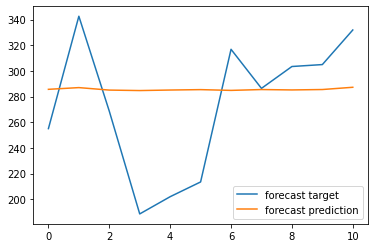

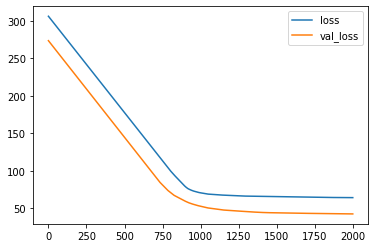

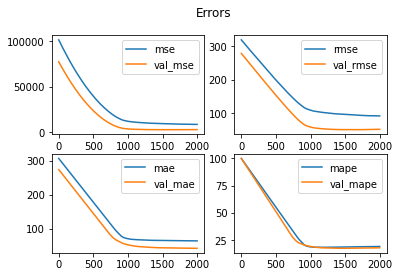

In [14]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)